In [48]:
import pandas as pd
import numpy as np


In [49]:
# Read in the data from the training & testing files
training_data = pd.read_csv('./resources//Training.csv')
testing_data = pd.read_csv('./resources//Testing.csv')

# Merge the data into a single dataset
merged_data = pd.concat([training_data, testing_data])

# Print the dataset details
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 41
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.1+ MB
None


In [50]:
# Read in the Celiac disease data
celiac_data = pd.read_csv('./resources//celiac_disease_lab_data.csv')

# Print the dataset details
print(celiac_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2206 non-null   int64  
 1   Gender            2206 non-null   object 
 2   Diabetes          2206 non-null   object 
 3   Diabetes Type     1788 non-null   object 
 4   Diarrhoea         2206 non-null   object 
 5   Abdominal         2206 non-null   object 
 6   Short_Stature     2206 non-null   object 
 7   Sticky_Stool      2206 non-null   object 
 8   Weight_loss       2206 non-null   object 
 9   IgA               2206 non-null   float64
 10  IgG               2206 non-null   float64
 11  IgM               2206 non-null   float64
 12  Marsh             2206 non-null   object 
 13  cd_type           2206 non-null   object 
 14  Disease_Diagnose  2206 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 258.6+ KB
None


In [51]:
# Add columns from celiac_data to merged_data with null values as master Disease_data
Disease_data = pd.concat([merged_data, celiac_data], ignore_index=True)

# Print the dataset details and validate the column and row counts add up
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Columns: 149 entries, itching to Disease_Diagnose
dtypes: float64(137), object(12)
memory usage: 8.1+ MB


In [52]:
# Read in the Celiac disease data
Monkeypox_data = pd.read_csv('./resources//Monkey-Pox.csv')

# Print the dataset details
print(Monkeypox_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB
None


In [53]:
# Add columns from Monkeypox_data to Disease_data with null values as master Disease_data
Disease_data = pd.concat([Disease_data, Monkeypox_data], ignore_index=True)

# Print the dataset details and validate the column and row counts add up
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 160 entries, itching to MonkeyPox
dtypes: float64(137), object(23)
memory usage: 39.3+ MB


In [54]:
#Fill the missing data with 0
Disease_data = Disease_data.fillna(0)


In [55]:
#Update the Prognosis as 'Celiac' when the 'Disease_Diagnose' from celiac data is Yes
Disease_data['prognosis'] = np.where(Disease_data['Disease_Diagnose'] == 'yes', 'Celiac', Disease_data['prognosis'])

#Validate the Data
display(Disease_data.loc[Disease_data['prognosis']=='Celiac'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Update the Prognosis as 'Celiac' when the 'Disease_Diagnose' from celiac data is Yes
Disease_data['prognosis'] = np.where(Disease_data['Disease_Diagnose'] == 'no', 'No disease identified', Disease_data['prognosis'])

#Validate the Data
display(Disease_data.loc[Disease_data['prognosis']=='No disease identified'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
4973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#drop the Disease_Diagnose column as the data is transformed
Disease_data = Disease_data.drop('Disease_Diagnose', axis=1)

#Validate the Data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 159 entries, itching to MonkeyPox
dtypes: float64(137), object(22)
memory usage: 39.0+ MB


In [58]:
#Update the Prognosis as 'Monkey Pox' when the 'MonkeyPox' from MP data is Positive
Disease_data['prognosis'] = np.where(Disease_data['MonkeyPox'] == 'Positive', 'Monkey Pox', Disease_data['prognosis'])

#Validate the Data
display(Disease_data.loc[Disease_data['prognosis']=='Monkey Pox'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
7169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Fever,True,False,True,True,False,False,True,False,Positive
7170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Fever,False,True,True,False,False,False,True,False,Positive
7171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,False,False,False,True,True,True,False,Positive
7172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
7174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Fever,False,True,False,False,False,False,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Fever,False,True,True,False,False,False,True,True,Positive
32163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,True,False,True,True,False,False,True,Positive
32164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Fever,False,True,True,False,True,True,True,True,Positive
32165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,True,False,False,True,True,False,False,Positive


In [59]:
#Update the Prognosis as  'No disease identified' when the 'MonkeyPox' from MP data is Negative
Disease_data['prognosis'] = np.where(Disease_data['MonkeyPox'] == 'Negative', 'No disease identified', Disease_data['prognosis'])

#Validate the Data
display(Disease_data.loc[Disease_data['prognosis']=='No disease identified'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
4973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Muscle Aches and Pain,False,True,True,True,False,False,True,True,Negative
32156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Muscle Aches and Pain,True,True,False,False,False,False,True,False,Negative
32158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Muscle Aches and Pain,False,False,True,True,False,False,True,False,Negative
32160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,False,True,False,False,False,False,True,Negative


In [60]:
#drop the MonkeyPox column as the data is transformed
Disease_data = Disease_data.drop('MonkeyPox', axis=1)

#Validate the Data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 158 entries, itching to Sexually Transmitted Infection
dtypes: float64(137), object(21)
memory usage: 38.8+ MB


In [61]:
#Drop Unnamed: 133 columns
Disease_data = Disease_data.drop('Unnamed: 133', axis=1)

#Validate the Data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 157 entries, itching to Sexually Transmitted Infection
dtypes: float64(136), object(21)
memory usage: 38.5+ MB


In [62]:
# Add 3 columns Fever, Swollen Lymph Nodes and Muscle Aches and transform the data for Monkey Pox
Disease_data = Disease_data.assign(Fever=0, Swollen_Lymph_Nodes=0, Muscle_Aches=0)

#Validate the Data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 160 entries, itching to Muscle_Aches
dtypes: float64(136), int64(3), object(21)
memory usage: 39.3+ MB


In [63]:
#Update the columns based on the Systemic illness field

Disease_data['Fever'] = np.where(Disease_data['Systemic Illness'] == 'Fever', '1', Disease_data['Fever'])

#Validate the Data
display(Disease_data.loc[Disease_data['Fever']=='1'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
7169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,True,False,1,0,0
7170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,1,0,0
7174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,True,False,1,0,0
7175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,1,0,0
7177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,True,False,True,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,True,True,False,True,1,0,0
32157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,True,True,False,False,False,1,0,0
32159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,True,True,1,0,0
32162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,True,1,0,0


In [64]:
#Update the columns based on the Systemic illness field

Disease_data['Swollen_Lymph_Nodes'] = np.where(Disease_data['Systemic Illness'] == 'Swollen Lymph Nodes', '1', Disease_data['Swollen_Lymph_Nodes'])

#Validate the Data
display(Disease_data.loc[Disease_data['Swollen_Lymph_Nodes']=='1'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
7172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,True,True,False,0,1,0
7173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0,1,0
7179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,False,0,1,0
7181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,0,1,0
7182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,True,False,False,0,1,0
32153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,True,True,0,1,0
32154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,True,True,True,True,0,1,0
32166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,0,1,0


In [65]:
#Update the columns based on the Systemic illness field

Disease_data['Muscle_Aches'] = np.where(Disease_data['Systemic Illness'] == 'Muscle Aches and Pain', '1', Disease_data['Muscle_Aches'])

#Validate the Data
display(Disease_data.loc[Disease_data['Muscle_Aches']=='1'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
7176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,True,False,False,False,False,0,0,1
7178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,True,True,True,False,True,0,0,1
7186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,False,False,0,0,1
7193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,False,True,0,0,1
7194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,True,False,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,True,False,0,0,1
32149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,True,True,False,0,0,1
32151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,True,False,False,True,True,0,0,1
32156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,True,False,0,0,1


In [66]:
#Drop the Systemic Illness column as it is transformed
Disease_data = Disease_data.drop('Systemic Illness', axis=1)

#Validate the Data
Disease_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 159 entries, itching to Muscle_Aches
dtypes: float64(136), object(23)
memory usage: 39.0+ MB


In [67]:
#Update the Age field where not available
Disease_data.loc[Disease_data['Age'] == 0, 'Age'] = np.random.randint(5, 70, sum(Disease_data['Age'] == 0))

#Validate the Data
display(Disease_data.loc[Disease_data['Age']!='0'])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,False,False,True,0,0,0
32164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,True,True,True,True,1,0,0
32165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,True,False,False,0,0,0
32166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,0,1,0


In [68]:
#For the missing gender data assign 1 or 0
Disease_data.loc[Disease_data['Gender'] == 0, 'Gender'] = np.random.choice([0, 1], sum(Disease_data['Gender'] == 0))


# For the data already as Male & Female Update the Gender to 1 & 0
Disease_data['Gender'] = np.where(Disease_data['Gender'] == 'Male', '1', Disease_data['Gender'])
Disease_data['Gender'] = np.where(Disease_data['Gender'] == 'Female', '0', Disease_data['Gender'])


#Validate the Data
display(Disease_data.loc[Disease_data['Gender']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,True,True,False,False,False,1,0,0
32159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,True,True,1,0,0
32161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,False,True,0,0,0
32164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,True,True,True,True,1,0,0


In [69]:
#Validate to check the data is approx distributed
display(Disease_data.loc[Disease_data['Gender']==0])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,0,0,0
32162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,True,1,0,0
32163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,False,False,True,0,0,0
32165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,True,False,False,0,0,0


In [70]:
#Update Diabetes
Disease_data['Diabetes'] = np.where(Disease_data['Diabetes'] == 'Yes', 1, 0)

#Validate Data
display(Disease_data.loc[Disease_data['Diabetes']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Update Diabetes
Disease_data['Diabetes Type'] = np.where(Disease_data['Diabetes Type'] == 'Type 1', 1, Disease_data['Diabetes Type'])

#Validate Data
display(Disease_data.loc[Disease_data['Diabetes Type']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Update Diabetes
Disease_data['Diabetes Type'] = np.where(Disease_data['Diabetes Type'] == 'Type 2', 2, Disease_data['Diabetes Type'])

#Validate Data
display(Disease_data.loc[Disease_data['Diabetes Type']==2])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
5060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Update Diarrhoea Details
Disease_data['Diarrhoea'] = np.where(Disease_data['Diarrhoea'] != 0, 1, Disease_data['Diarrhoea'])

#Validate Data
display(Disease_data.loc[Disease_data['Diarrhoea']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Merge the Diarrhoe columns
Disease_data['Diarrhoea'] = Disease_data['Diarrhoea'].combine_first(Disease_data['diarrhoea'])
Disease_data.drop('diarrhoea', axis=1, inplace=True)

#Validate Data
Disease_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 158 entries, itching to Muscle_Aches
dtypes: float64(135), int64(1), object(22)
memory usage: 38.8+ MB


In [75]:
#Update Abdominal Data
Disease_data['Abdominal'] = np.where(Disease_data['Abdominal'] == 'yes', 1, 0)

#Validate the data 
display(Disease_data.loc[Disease_data['Abdominal']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Merge Data with Abdominal_Pain and drop the columns
Disease_data['Abdominal'] = Disease_data['Abdominal'].combine_first(Disease_data['abdominal_pain'])
Disease_data.drop('abdominal_pain', axis=1, inplace=True)

#Validate Data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 157 entries, itching to Muscle_Aches
dtypes: float64(134), int64(2), object(21)
memory usage: 38.5+ MB


/var/folders/8t/cgwwg75d0n35t9lq2msz2g4h0000gn/T/ipykernel_31485/3198851271.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Disease_data['Abdominal'] = Disease_data['Abdominal'].combine_first(Disease_data['abdominal_pain'])


In [77]:
Disease_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Update Sticky_Stool Data
Disease_data['Sticky_Stool'] = np.where(Disease_data['Sticky_Stool'] == 'yes', 1, 0)

#Validate the data 
display(Disease_data.loc[Disease_data['Sticky_Stool']==1])


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
display(Disease_data.loc[Disease_data['Sticky_Stool']==0])


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,False,False,True,0,0,0
32164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,True,True,True,True,1,0,0
32165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,True,False,False,0,0,0
32166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,0,1,0


In [80]:
#Update Sticky_Stool Data
Disease_data['Weight_loss'] = np.where(Disease_data['Weight_loss'] == 'yes', 1, 0)

#Validate the data 
display(Disease_data.loc[Disease_data['Weight_loss']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
display(Disease_data.loc[Disease_data['Weight_loss']==0])


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,False,False,True,0,0,0
32164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,True,True,True,True,1,0,0
32165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,True,False,False,0,0,0
32166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,True,True,False,False,0,1,0


In [82]:
#Dropping columns that are not needed for overall diagnosis
Disease_data.drop(['IgA','IgG','IgM','Patient_ID'], axis=1, inplace=True)

#Validate the data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 153 entries, itching to Muscle_Aches
dtypes: float64(131), int64(4), object(18)
memory usage: 37.5+ MB


In [83]:
#Transform the Short_stature column data
Disease_data['PSS'] = (Disease_data['Short_Stature'] == 'PSS').astype(int)
Disease_data['Variant'] = (Disease_data['Short_Stature'] == 'Variant').astype(int)
Disease_data['DSS'] = (Disease_data['Short_Stature'] == 'DSS').astype(int)

#Validate the data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 156 entries, itching to DSS
dtypes: float64(131), int64(7), object(18)
memory usage: 38.3+ MB


In [84]:
#Validate the data
display(Disease_data.loc[Disease_data['PSS']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches,PSS,Variant,DSS
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
#Dropping columns Short_Stature as the data is transformed
Disease_data.drop(['Short_Stature'], axis=1, inplace=True)

#Validate the data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 155 entries, itching to DSS
dtypes: float64(131), int64(7), object(17)
memory usage: 38.0+ MB


In [86]:
#Update Marsh Data
Disease_data['Marsh'] = np.where(Disease_data['Marsh'] == 'none', 0, Disease_data['Marsh'])
Disease_data['Marsh'] = np.where(Disease_data['Marsh'] == 0, 0, 1)

#Validate the data 
display(Disease_data.loc[Disease_data['Marsh']==1])

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches,PSS,Variant,DSS
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
#Dropping columns cd_type as it is specific for Celiac data
Disease_data.drop(['cd_type'], axis=1, inplace=True)

#Validate the data
Disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32168 entries, 0 to 32167
Columns: 154 entries, itching to DSS
dtypes: float64(131), int64(8), object(15)
memory usage: 37.8+ MB


In [88]:
#Adjust the columns
Disease_data = Disease_data[['Age', 'Gender'] + [col for col in Disease_data.columns if col not in ['Age', 'Gender', 'prognosis']] + ['prognosis']]




In [89]:
#validate the data
Disease_data.head()

,Age,Gender,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,...,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Fever,Swollen_Lymph_Nodes,Muscle_Aches,PSS,Variant,DSS,prognosis
0,12.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,53.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,57.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,27.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,10.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [90]:
# Save the merged data to a new file
Disease_data.to_csv('./resources//Disease_data.csv', index=False)

In [100]:
Disease_data.shape

recs = Disease_data['prognosis'].unique()
recs

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Celiac',
       'No disease identified', 'Monkey Pox'], dtype=object)

In [93]:
Disease_data.shape

(32168, 154)

/var/folders/8t/cgwwg75d0n35t9lq2msz2g4h0000gn/T/ipykernel_31485/2368035359.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Disease_data, x='prognosis', y='Age', ci=None)


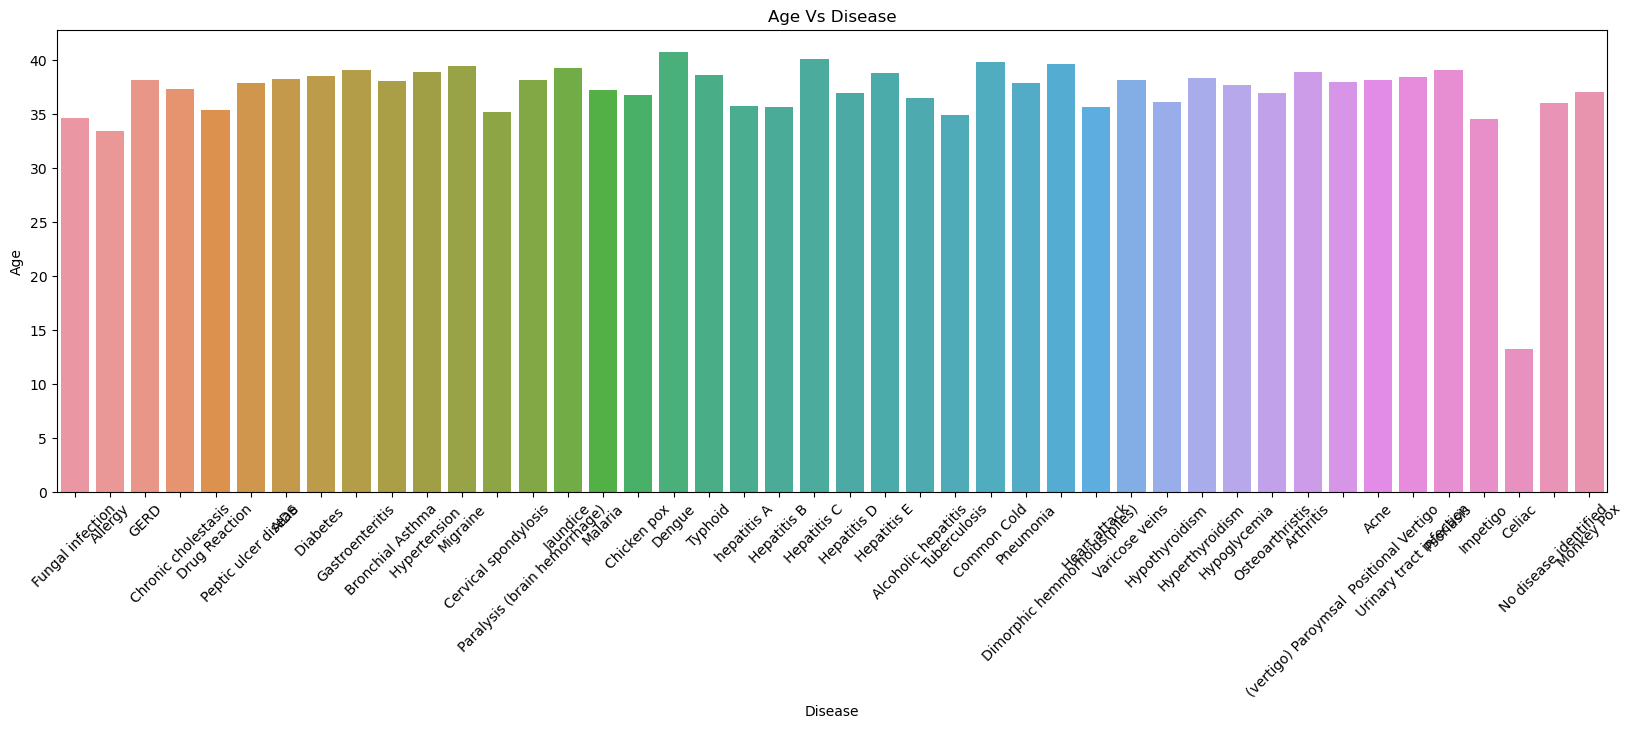

In [112]:
#Plots 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.barplot(data=Disease_data, x='prognosis', y='Age', ci=None)
plt.title('Age Vs Disease')
plt.xlabel('Disease')
plt.ylabel('Age')
plt.xlabel
plt.xticks(rotation=45)
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


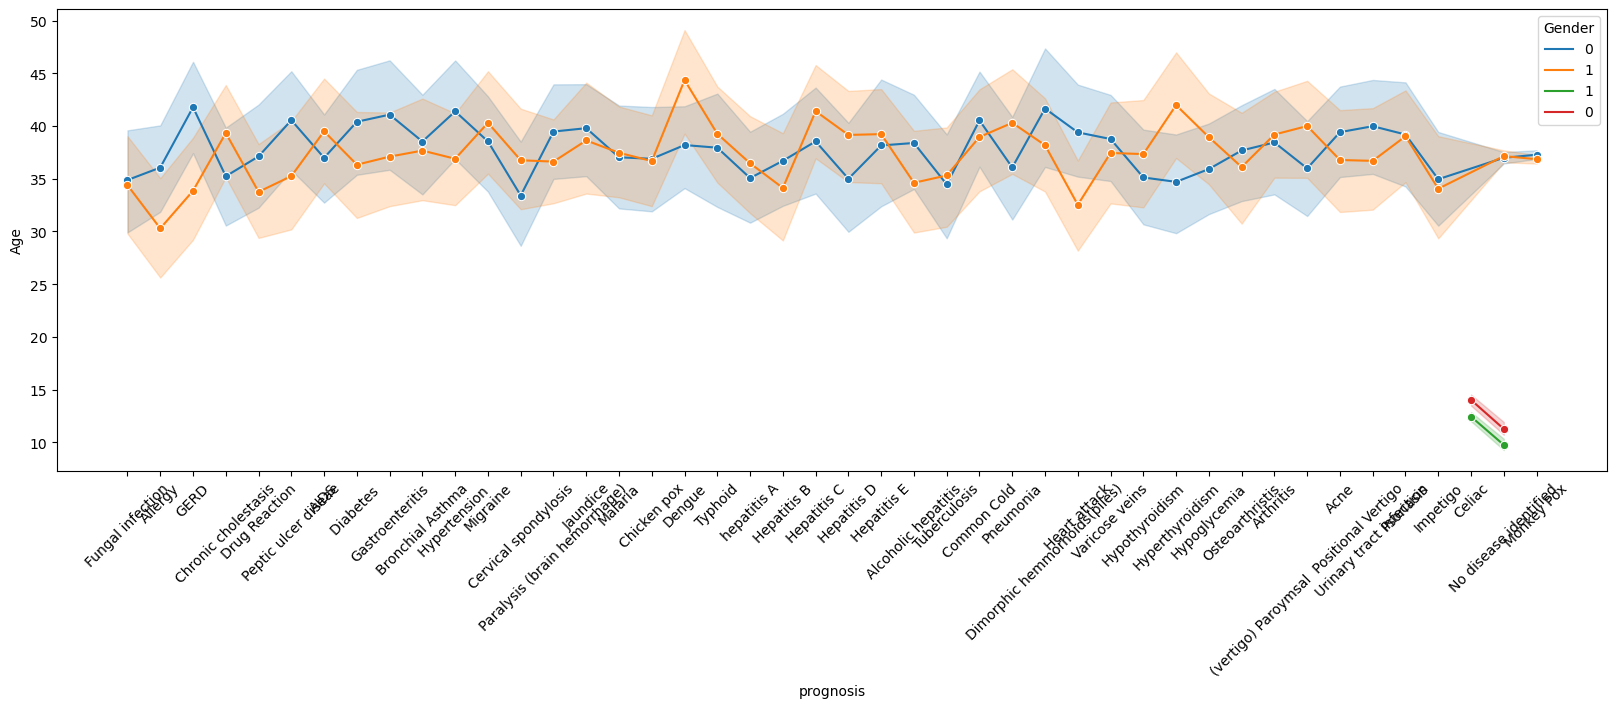

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for pm2.5 over time with rotated x-axis labels
plt.figure(figsize=(20, 6))
sns.lineplot(data=Disease_data, x='prognosis', y='Age', hue='Gender', marker='o')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


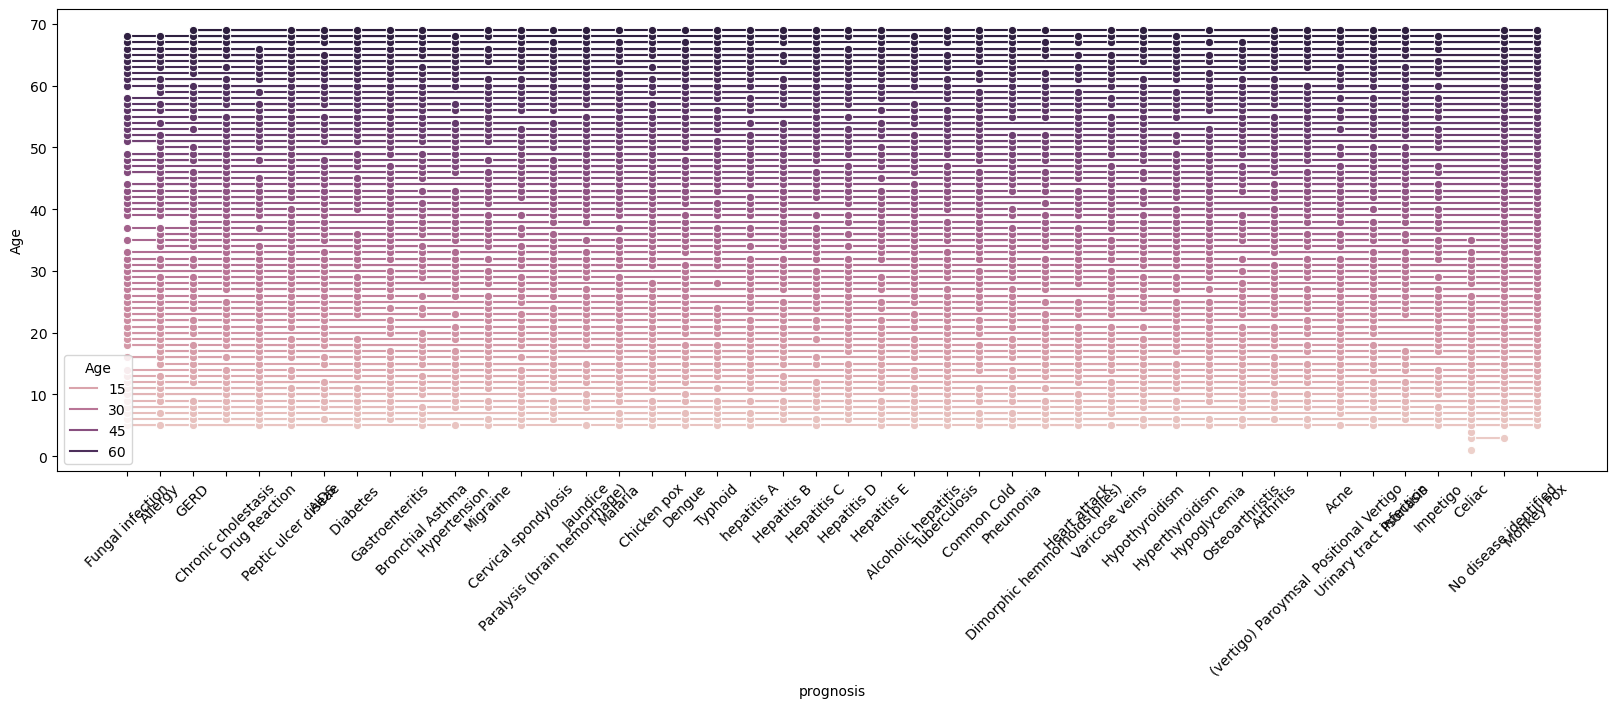

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for pm2.5 over time with rotated x-axis labels
plt.figure(figsize=(20, 6))
sns.lineplot(data=Disease_data, x='prognosis', y='Age', hue='Age', marker='o')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()
